Варіант 4
Контекст:
Ваш набір даних містить показники інфляції, дефлятор ВВП (річний %), які збирає Світовий Банк (The World Bank).
Поля включають:
•	Country – Країна
•	Country Code - код країни
•	Year – рік
•	Inflation - інфляція
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є (дроп або заміна даних)
3.	Зробіть розвідувальний аналіз даних:
a.	Знайдіть топ-10 країн з найбільшою сумарною інфляцією за період з 2010 по 2016 роки
b.	Обрахуйте кореляційну матрицю між показниками інфляції країн із даних за період з 2000 по 2016
c.	Намалюйте heatmap розрахованої кореляційної матриці

In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [55]:
df = pd.read_csv('inflation-gdp_csv.csv')
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]

In [56]:
CLEAN = ["Caribbean small states", "World", "Yemen, Rep.", "West Bank and Gaza", "Upper middle income", "Sub-Saharan Africa (excluding high income)", "South Asia (IDA & IBRD)", "South Asia", "South Africa", "Small states", "Pre-demographic dividend", "Post-demographic dividend", "Pacific island small states", "Other small states","OECD members", "North America","Middle income", "Middle East & North Africa (excluding high income)", "Micronesia, Fed. Sts.", "Lower middle income","Low income","Low & middle income", "Least developed countries: UN classification", "Latin America & the Caribbean (IDA & IBRD countries)", "Late-demographic dividend", "IDA total", "IDA blend", "IDA & IBRD total", "IBRD only", "Hong Kong SAR, China", "High income", "Heavily indebted poor countries (HIPC)", "Fragile and conflict affected situations", "European Union", "Europe & Central Asia (excluding high income)", "East Asia & Pacific (excluding high income)", "Early-demographic dividend", "Central African Republic", "Caribbean small states", "Arab World", "Central Europe and the Baltics", "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (IDA & IBRD countries)", "IDA only", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Middle East & North Africa", "Middle East & North Africa (IDA & IBRD countries)", "Sub-Saharan Africa", "Sub-Saharan Africa (IDA & IBRD countries)"]

In [57]:
df=df[~df['country'].isin(CLEAN)]

In [58]:
df_task = df[(df.year >= 2000) & (df.year <= 2016)]

In [59]:
display(df_task)

,country,country_code,year,inflation
2185,Afghanistan,AFG,2003,11.715672
2186,Afghanistan,AFG,2004,11.242729
2187,Afghanistan,AFG,2005,10.900268
2188,Afghanistan,AFG,2006,7.171261
2189,Afghanistan,AFG,2007,22.382016
...,...,...,...,...
11009,Zimbabwe,ZWE,2012,2.563181
11010,Zimbabwe,ZWE,2013,2.805703
11011,Zimbabwe,ZWE,2014,0.700921
11012,Zimbabwe,ZWE,2015,0.898072


a.	Знайдіть топ-10 країн з найбільшою сумарною інфляцією за період з 2010 по 2016 роки

In [60]:
df_task_a = df[(df.year >= 2010)].copy()

In [61]:
sum_task_a = df_task_a.groupby("country", as_index=False).sum().sort_values(["inflation"],ascending=False).reset_index(drop=True).head(10)

In [62]:
display(sum_task_a)

,country,year,inflation
0,Belarus,14091,224.157862
1,Argentina,14091,196.385913
2,"Venezuela, RB",10060,164.095054
3,Sudan,14091,159.415534
4,Nigeria,14091,145.547394
5,Malawi,14091,132.121933
6,Ghana,14091,113.205798
7,"Iran, Islamic Rep.",14091,112.083701
8,Ukraine,14091,111.670361
9,South Sudan,12075,92.643884


[Text(0, 0, 'Belarus'),
 Text(1, 0, 'Argentina'),
 Text(2, 0, 'Venezuela, RB'),
 Text(3, 0, 'Sudan'),
 Text(4, 0, 'Nigeria'),
 Text(5, 0, 'Malawi'),
 Text(6, 0, 'Ghana'),
 Text(7, 0, 'Iran, Islamic Rep.'),
 Text(8, 0, 'Ukraine'),
 Text(9, 0, 'South Sudan')]

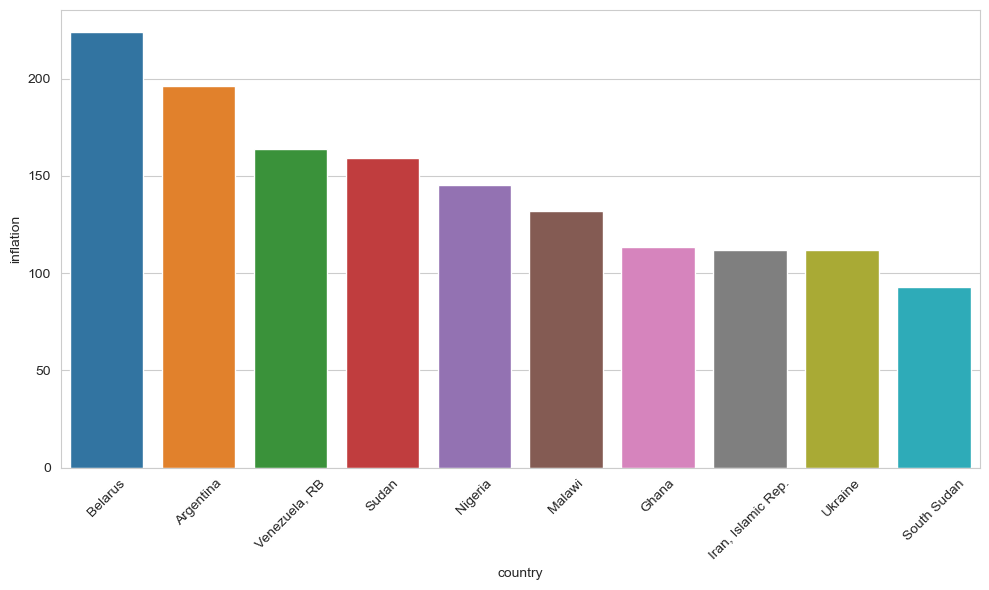

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=sum_task_a, x="country", y="inflation")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

b.	Обрахуйте кореляційну матрицю між показниками інфляції країн із даних за період з 2000 по 2016

In [67]:
dict_task_2 = df_task.groupby(["country", "year"]).sum().sort_values("inflation", ascending=False)
display(dict_task_2)
dict_transform = dict_task_2.loc[dict_task_2.index.get_level_values(0).unique()[:10].tolist()]

df_task_2 = pd.pivot_table(dict_transform,columns='country',values='inflation',index='year').fillna(0)
display(df_task_2)

inflation
country             year             
Congo, Dem. Rep.    2000  2630.122674
Angola              2000   418.232954
                    2002   196.576793
Belarus             2000   185.290798
Malawi              2002   112.693648
...                               ...
Libya               2009   -25.312796
Kuwait              2015   -25.959144
Iraq                2015   -26.865709
Trinidad and Tobago 2009   -27.632652
Congo, Rep.         2015   -29.691067

[3282 rows x 1 columns]

country,Angola,Belarus,"Congo, Dem. Rep.",Ghana,Guinea,Guinea-Bissau,Malawi,Nigeria,Serbia,Zimbabwe
year,,,,,,,,,,
2000,418.232954,185.290798,2630.122674,27.230114,6.300124,80.899676,30.533951,35.229534,78.578533,0.627900
2001,106.322492,79.534573,73.059711,34.817944,1.752426,6.769181,25.622467,-0.322617,89.244649,-0.130890
2002,196.576793,44.893739,31.719461,22.818585,0.432772,1.796814,112.693648,39.896658,18.043281,2.712950
2003,84.886623,30.685321,13.415454,28.704407,15.910697,-5.011826,10.346094,11.140937,12.589473,8.801275
2004,39.792767,22.675123,6.365458,14.350151,16.521583,-1.386774,14.846628,-0.157748,9.086994,7.611525
2005,26.816432,18.972162,29.869547,14.963718,27.390845,5.800547,10.741236,22.024403,14.329371,5.136601
2006,13.041077,10.748610,12.106684,80.750942,98.051028,-2.274026,19.967259,17.337782,11.861849,-2.017679
2007,12.616477,12.872709,18.868965,18.630277,13.940219,4.383674,4.099721,4.770742,8.217988,0.894887
2008,19.681562,21.213533,19.584887,19.410271,16.695616,12.465702,11.964667,10.835298,10.617107,1.349223


In [68]:
correlation_task_c = df_task_2.corr()
display(correlation_task_c)

country,Angola,Belarus,"Congo, Dem. Rep.",Ghana,Guinea,Guinea-Bissau,Malawi,Nigeria,Serbia,Zimbabwe
country,,,,,,,,,,
Angola,1.000000,0.846457,0.882361,0.113045,-0.170184,0.831251,0.460304,0.257277,0.727491,-0.168951
Belarus,0.846457,1.000000,0.852298,0.024721,-0.230973,0.844780,0.196460,0.103147,0.763081,-0.211189
"Congo, Dem. Rep.",0.882361,0.852298,1.000000,0.072641,-0.102532,0.959615,0.091605,0.189104,0.638160,-0.084367
Ghana,0.113045,0.024721,0.072641,1.000000,0.851348,-0.007946,0.065422,0.006449,0.239818,-0.186436
Guinea,-0.170184,-0.230973,-0.102532,0.851348,1.000000,-0.159660,-0.172891,0.084440,-0.135525,-0.181307
Guinea-Bissau,0.831251,0.844780,0.959615,-0.007946,-0.159660,1.000000,0.064088,0.178894,0.623891,-0.173590
Malawi,0.460304,0.196460,0.091605,0.065422,-0.172891,0.064088,1.000000,0.214057,0.161360,-0.168653
Nigeria,0.257277,0.103147,0.189104,0.006449,0.084440,0.178894,0.214057,1.000000,0.015945,-0.189121
Serbia,0.727491,0.763081,0.638160,0.239818,-0.135525,0.623891,0.161360,0.015945,1.000000,-0.133425


<AxesSubplot:xlabel='country', ylabel='country'>

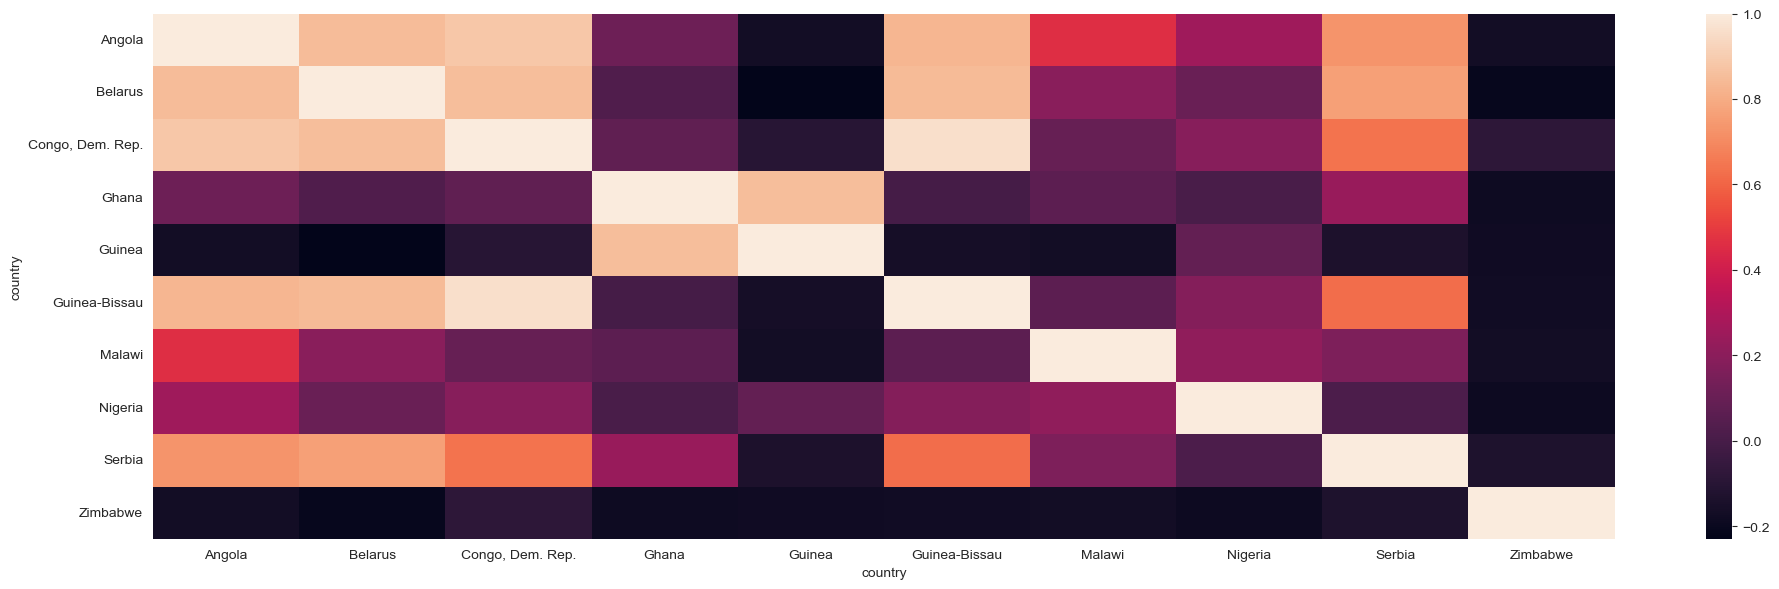

In [71]:
plt.figure(figsize=(20,6))
plt.rcParams["figure.autolayout"] = True
sns.heatmap(correlation_task_c.head(11))